# First steps

I first import all of the necessary packages, load the labeled data and merge it into one dataframe, clean the dataframe (for example, looking if there are missing values) and I check that everything is correct. I also merge together the column 'Title' and 'Text', so that the model has more data to be trained on. Finally, I delete the unnecessary columns.

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import regex
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download("stopwords")
nltk.download("punkt")
import gensim
from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load("W2V.kv", mmap='r+')
vocabs = word_vectors.index_to_key
vectors = word_vectors.vectors
from embeddingvectorizer import EmbeddingCountVectorizer, EmbeddingTfidfVectorizer
import embeddingvectorizer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import chi2_contingency
from tabulate import tabulate

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
data = pd.read_csv("articlesFattoQuotidiano_labeledissue4.csv", encoding = 'latin1')
data1 = pd.read_csv("articlesPost_labeledissue4.csv", encoding = 'latin1')
data2 = pd.read_csv("articlesOpen_labeledissue4.csv", encoding = 'latin1')
data3 = pd.read_csv("articlesHuff_labeledissue4.csv", encoding = 'latin1')
data4 = pd.read_csv("articlesRepubblica_labeledissue4.csv", encoding = 'latin1')
finaldata = data.merge(data1, how = 'outer')
finaldata2 = finaldata.merge(data2, how = 'outer')
finaldata3 = finaldata2.merge(data3, how = 'outer')
labeled_articles= finaldata3.merge(data4, how = 'outer')
labeled_articles

,Link,Title,Text,News outlet,Frame
0,https://www.ilfattoquotidiano.it/2022/10/01/el...,"Elezioni, Anpi: âIl nuovo governo onori il g...","Il documento: ""Esito elettorale apre una fase ...",Il Fatto Quotidiano,0
1,https://www.ilfattoquotidiano.it/2022/09/30/ro...,Rosy Bindi a La7: âPd si metta a disposizion...,âSe il Pd non si mette a disposizione per ...,Il Fatto Quotidiano,0
2,https://www.ilfattoquotidiano.it/2022/09/30/ef...,"Effetto flipper, come funziona il meccanismo d...","Il sistema scatta quando i conti non tornano, ...",Il Fatto Quotidiano,5
3,https://www.ilfattoquotidiano.it/2022/09/29/ca...,Cacciari a La7: âSe Pd e M5s ora non trovano...,âTra Pd e 5 Stelle o câÃ¨ ora una qualch...,Il Fatto Quotidiano,0
4,https://www.ilfattoquotidiano.it/2022/09/29/de...,De Masi a La7: âPd dice di essere di sinistr...,âIl M5s avrebbe preso piÃ¹ voti se ci foss...,Il Fatto Quotidiano,0
...,...,...,...,...,...
445,https://video.repubblica.it/dossier/elezioni-2...,"Di Maio: ""Berlusconi-Meloni-Salvini 'trio sfas...",NaN,La Repubblica,0
446,https://video.repubblica.it/dossier/elezioni-2...,"Pontida, anticomuniste cubane scambiate per co...",NaN,La Repubblica,0
447,https://video.repubblica.it/edizione/bologna/b...,"Bologna, insulti e minacce ai militanti di Fra...","""Carogne, mafiosi, traditori. Quale piazza pre...",La Repubblica,0
448,https://video.repubblica.it/dossier/elezioni-2...,Salvini e Meloni tra baci e coltelli: il nuovo...,C'Ã¨ chi propone di aprire un congresso dopo l...,La Repubblica,0


In [3]:
duplicates = labeled_articles.duplicated()
print(labeled_articles[duplicates])

Empty DataFrame
Columns: [Link, Title, Text, News outlet, Frame]
Index: []


In [4]:
labeled_articles.isnull().sum().sum()

153

In [5]:
labeled_articles = labeled_articles.dropna()

In [6]:
labeled_articles.isnull().sum().sum()

0

In [7]:
labeled_articles['Full_text'] = labeled_articles['Title'] + ' ' + labeled_articles['Text']
labeled_articles = labeled_articles.drop(columns=["Title", "Text", "Link"]).copy()

C:\Users\franc\AppData\Local\Temp\ipykernel_21192\3495950442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labeled_articles['Full_text'] = labeled_articles['Title'] + ' ' + labeled_articles['Text']


In [8]:
labeled_articles.Full_text.str.contains(r"https?://[\w\.]+\b|www\.[\w\.]+\b").sum()

0

In [9]:
labeled_articles.Full_text.str.contains(r"</?\w[^>]*>").sum()

0

In [10]:
labeled_articles.Full_text.str.contains(r"&[^;]+;").sum()

1

In [11]:
labeled_articles.to_csv("labeled_articlesNEW.csv", index=False)
labeled_articles

,News outlet,Frame,Full_text
0,Il Fatto Quotidiano,0,"Elezioni, Anpi: âIl nuovo governo onori il g..."
1,Il Fatto Quotidiano,0,Rosy Bindi a La7: âPd si metta a disposizion...
2,Il Fatto Quotidiano,5,"Effetto flipper, come funziona il meccanismo d..."
3,Il Fatto Quotidiano,0,Cacciari a La7: âSe Pd e M5s ora non trovano...
4,Il Fatto Quotidiano,0,De Masi a La7: âPd dice di essere di sinistr...
...,...,...,...
443,La Repubblica,0,Conte finisce a una sfilata a Milano e lo stuz...
444,La Repubblica,0,"Conte canta 'Bella Ciao': ""Ã il simbolo della..."
447,La Repubblica,0,"Bologna, insulti e minacce ai militanti di Fra..."
448,La Repubblica,0,Salvini e Meloni tra baci e coltelli: il nuovo...


In [12]:
value_counts = labeled_articles['Frame'].value_counts()

print(value_counts)

0    212
5     85
Name: Frame, dtype: int64


# Creating the tokenizer and splitting the datset

I create my tokenizer and choose Italian as a language as the texts are in Italian. I print two sentences to see how it performs. It performs quite well: punctuation is removed, articles and words are identified well. Then, I divide the data into two subsets: a train a and a test subset. Finally, I test how the main clasfiers of supervised machine learning perform in predicting the labels of the texts together with the most two known vectorizers: CountVectorizer and TfidfVectorizer. I look at the accuracy scores as well as at the classification report to have a more accurate voerview of how the model perform for each category of the dependent variables. This is particularly important considering the limited amount of data avilable. 

In [13]:
class MyTokenizer:
    def tokenize(self, text):
        result = []
        word =  r"\p{letter}"
        tokens = nltk.word_tokenize(text, language = "Italian")
        tokens = [t for t in tokens if regex.search(word, t)]
        result += tokens
        return result
    
mytokenizer = MyTokenizer()
sentence = "Amaro lucano. La Regina cade sul post antisionista, si riapre lo scontro nel Pd"
sentence2 = "Berlusconi uccide una mosca in diretta tv: Vedete, sono ancora in gamba"
print(mytokenizer.tokenize(sentence))
print(mytokenizer.tokenize(sentence2))

['Amaro', 'lucano', 'La', 'Regina', 'cade', 'sul', 'post', 'antisionista', 'si', 'riapre', 'lo', 'scontro', 'nel', 'Pd']
['Berlusconi', 'uccide', 'una', 'mosca', 'in', 'diretta', 'tv', 'Vedete', 'sono', 'ancora', 'in', 'gamba']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(labeled_articles["Full_text"], labeled_articles["Frame"], test_size=0.2, random_state=5)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(237,) (237,)
(60,) (60,)


In [15]:
models = [
    ("NB-count", CountVectorizer(tokenizer=mytokenizer.tokenize, min_df=5, max_df=.5), MultinomialNB()),
    ("NB-TfIdf", TfidfVectorizer(tokenizer=mytokenizer.tokenize, min_df=5, max_df=.5), MultinomialNB()),
    (
        "LR-Count", CountVectorizer(tokenizer=mytokenizer.tokenize, min_df=5, max_df=.5),
        LogisticRegression(solver="liblinear"),
    ),
    (
        "LR-TfIdf", TfidfVectorizer(tokenizer=mytokenizer.tokenize, min_df=5, max_df=.5),
        LogisticRegression(solver="liblinear"),
    ),
    (
        "SVC-count", CountVectorizer(tokenizer=mytokenizer.tokenize, min_df=5, max_df=.5),
        SVC(gamma="scale"),
    ),
    (   "SVC-TfIdf", TfidfVectorizer(tokenizer=mytokenizer.tokenize, min_df=5, max_df=.5),
        SVC(gamma="scale"),
    ),
    (
        "RF-Count", CountVectorizer(tokenizer=mytokenizer.tokenize, min_df=5, max_df=.5),
        RandomForestClassifier(n_estimators=100),
    ),
    (   "RF-TfIdf", TfidfVectorizer(tokenizer=mytokenizer.tokenize, min_df=5, max_df=.5),
        RandomForestClassifier(n_estimators=100),
    ),
]

for name, vectorizer, classifier in models:
    print(name)
    X_train2 = vectorizer.fit_transform(X_train)
    X_test2 = vectorizer.transform(X_test)
    classifier.fit(X_train2, y_train)
    y_pred = classifier.predict(X_test2)
    print(metrics.accuracy_score(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print("\n")

C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


NB-count
0.8
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        39
           5       1.00      0.43      0.60        21

    accuracy                           0.80        60
   macro avg       0.88      0.71      0.73        60
weighted avg       0.85      0.80      0.77        60



NB-TfIdf


C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.65
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        39
           5       0.00      0.00      0.00        21

    accuracy                           0.65        60
   macro avg       0.33      0.50      0.39        60
weighted avg       0.42      0.65      0.51        60



LR-Count


C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

0.7166666666666667
              precision    recall  f1-score   support

           0       0.70      0.97      0.82        39
           5       0.83      0.24      0.37        21

    accuracy                           0.72        60
   macro avg       0.77      0.61      0.59        60
weighted avg       0.75      0.72      0.66        60



LR-TfIdf


C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.65
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        39
           5       0.00      0.00      0.00        21

    accuracy                           0.65        60
   macro avg       0.33      0.50      0.39        60
weighted avg       0.42      0.65      0.51        60



SVC-count


C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

0.65
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        39
           5       0.00      0.00      0.00        21

    accuracy                           0.65        60
   macro avg       0.33      0.50      0.39        60
weighted avg       0.42      0.65      0.51        60



SVC-TfIdf


C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

0.65
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        39
           5       0.00      0.00      0.00        21

    accuracy                           0.65        60
   macro avg       0.33      0.50      0.39        60
weighted avg       0.42      0.65      0.51        60



RF-Count


C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

0.7
              precision    recall  f1-score   support

           0       0.69      0.97      0.81        39
           5       0.80      0.19      0.31        21

    accuracy                           0.70        60
   macro avg       0.75      0.58      0.56        60
weighted avg       0.73      0.70      0.63        60



RF-TfIdf


C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.6833333333333333
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        39
           5       1.00      0.10      0.17        21

    accuracy                           0.68        60
   macro avg       0.84      0.55      0.49        60
weighted avg       0.79      0.68      0.58        60





I see that overall the models perform well, but this is mainly because they perform very well on the first category, rather than on the issue framing. Therefore, I need to improve the accruacy scores as well as the precision and recall scores of the model. To do so, I use word embeddings.

# Testing the models with word embeddings

I use a non-BOW approach to achieve better accuracy scores. I decided to use word embeddings because I think that they are quite useful in analysing Italian texts and news healdlines dealing with politics. Word embeddings are a powerful tool for natural language processing, as they allow you to represent words in a high-dimensional space, where words with similar meanings are located close to each other. This moves beyong the BOW approaches that takes into account simply the frequency of words. With word embeddings the classifier can be trained to find synonyms and analogies. Hence, this can help improve the accuracy of machine learning models by providing them with more informative features. I especially think that they are useful to analyse Italian, as it is a language rich of synonyms, analogies and comparisons. First, I create a dataframe with the words and their asisgned values and then I create a dict which I will then use to test various combinations of vectorizers and classifiers with word embeddings. I try the two most common vectorizers (Count and Tfidf) and the main models that we studied so far. Even though the Naive Bayes classifer worked quite well with a Count vectorizer, I cannot train it with word embeddings as it cannot handle negative numbers. First, I check that the word embeddings work well. Moreover, I include random forests and not decision trees as, overall, the former perform better than the latter ones. I retrieved the word embeddings from this website: https://mlunicampania.gitlab.io/italian-word2vec/. Again, I look at both the accuracy scores and the classification reports to have a better overview of hoe the models perform and especially to see if they perform better in detecting the issue frame than before. 

In [16]:
wvdf = pd.DataFrame(word_vectors.vectors, index=word_vectors.index_to_key)
word_vectors2_dict = dict(zip(vocabs, vectors))
wvdf.sort_values(0, ascending=False).head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
amphibiaweb.org,2.383386,1.243215,0.782704,-0.691165,-0.080835,-0.638561,0.840422,-0.200750,-0.346297,-0.177310,...,0.180366,-0.216721,-0.936201,0.130300,-0.004838,0.211580,0.984754,1.653805,0.114008,-0.441808
andegavorum,2.299073,-0.154413,0.084963,-1.317420,-0.928468,0.823194,0.533603,1.324872,0.344809,0.539048,...,1.051035,0.421230,-0.626271,0.624682,0.080760,0.849758,0.217712,0.712347,0.353163,0.887824
reiske,2.295041,0.204441,-0.022760,-0.315606,-0.029753,0.225191,0.215381,0.882625,0.238328,0.765809,...,-0.305810,-0.304357,0.177891,0.143306,-0.139650,0.563671,-0.424972,-0.311885,-0.303003,0.353190
virginem,2.273339,0.794300,-0.029058,-0.793297,-0.021337,-0.441115,-0.172477,0.717569,-0.402575,-0.233796,...,-0.220241,0.241052,0.109762,0.646236,0.351735,-0.240822,-0.089408,0.772591,-0.059612,-0.367220
bruys,2.262714,0.225114,0.016751,-0.411804,-0.056492,0.211376,0.192823,0.057007,0.814759,-0.872253,...,-0.257632,-0.106817,0.672275,-0.705625,1.161071,0.008391,0.246170,0.354919,0.059887,0.349734


In [17]:
modelsWE = [
    (
        "LR-Count", 
        embeddingvectorizer.EmbeddingCountVectorizer(word_vectors2_dict, operator='sum'),
        LogisticRegression(solver="liblinear"), 
    ),
    (
        "LR-TfIdf",
        embeddingvectorizer.EmbeddingTfidfVectorizer(word_vectors2_dict, operator='sum'),
        LogisticRegression(solver="liblinear"),
    ),
    (
        "SVC-count",
        embeddingvectorizer.EmbeddingCountVectorizer(word_vectors2_dict, operator='sum'),
        SVC(gamma="scale"),
    ),
    (   "SVC-TfIdf",
        embeddingvectorizer.EmbeddingTfidfVectorizer(word_vectors2_dict, operator='sum'),
        SVC(gamma="scale"),
    ),
    (
        "RF-Count",
        embeddingvectorizer.EmbeddingCountVectorizer(word_vectors2_dict, operator='sum'),
        RandomForestClassifier(n_estimators=100),
    ),
    (   "RF-TfIdf",
        embeddingvectorizer.EmbeddingTfidfVectorizer(word_vectors2_dict, operator='sum'),
        RandomForestClassifier(n_estimators=100),
    ),
]

for name, vectorizer, classifier in modelsWE:
    print(name)
    X_train3 = np.array(list(vectorizer.fit_transform(X_train)))
    X_test3 = np.array(list(vectorizer.transform(X_test)))
    classifier.fit(X_train3, y_train)
    y_pred = classifier.predict(X_test3)
    print(metrics.accuracy_score(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print("\n")

LR-Count
0.7666666666666667
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        39
           5       0.67      0.67      0.67        21

    accuracy                           0.77        60
   macro avg       0.74      0.74      0.74        60
weighted avg       0.77      0.77      0.77        60



LR-TfIdf
0.7333333333333333
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        39
           5       0.67      0.48      0.56        21

    accuracy                           0.73        60
   macro avg       0.71      0.67      0.68        60
weighted avg       0.72      0.73      0.72        60



SVC-count
0.65
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        39
           5       0.00      0.00      0.00        21

    accuracy                           0.65        60
   macro avg       0.33      0.50      0.39        60

C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

0.65
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        39
           5       0.00      0.00      0.00        21

    accuracy                           0.65        60
   macro avg       0.33      0.50      0.39        60
weighted avg       0.42      0.65      0.51        60



RF-Count


C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\franc\OneDrive\Documents\uVa Master\phyton\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

0.65
              precision    recall  f1-score   support

           0       0.66      0.97      0.78        39
           5       0.50      0.05      0.09        21

    accuracy                           0.65        60
   macro avg       0.58      0.51      0.44        60
weighted avg       0.60      0.65      0.54        60



RF-TfIdf
0.7
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        39
           5       1.00      0.14      0.25        21

    accuracy                           0.70        60
   macro avg       0.84      0.57      0.53        60
weighted avg       0.79      0.70      0.62        60





# Tuning the model

I see that the model which performs best is the LR classifier with the Count vectorizer, as it has good scores for accuracy, precision, recall and f1 for both categories of the dependent variable. I tune the model to get even better results. Given that tuning is very time consuming and my laptop struggles with it, I will copy paste the result that I got and I will not run it again. 

#I define my pipeline as the parameters that I am looking at. I look at C, which determines how much regularization is applied to the logistic regression model. I also look at class weight, which controls the class weights for handling class imbalance. This is particularly important when working with unbalanced data. Gievn that my data is slightly unbalanced, I analyse it. 

my_pipeline = Pipeline([
    ('vectorizer', embeddingvectorizer.EmbeddingCountVectorizer(word_vectors2_dict, operator='sum')),
    ('classifier', LogisticRegression(solver="liblinear"max_iter=1000))
])

param_grid = {
    'classifier__C': [0.1, 1.0, 10.0],  # Explore different regularization strengths (inverse of regularization parameter)
    'classifier__class_weight': ['balanced', None]
}

grid_search = GridSearchCV(my_pipeline, param_grid, cv=5, scoring='accuracy')

#I fit the grid to the traning data
grid_search.fit(X_train, y_train)

#I look at the best parameters, accuracy scores, and the classfication report. 
y_pred = best_estimator.predict(X_test)
print("Best Parameter:", grid_search.best_params_)
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

#I get this results: 
Best Parameter: {'classifier__C': 0.1, 'classifier__class_weight': None}
0.7666666666666667
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        39
           5       0.67      0.67      0.67        21

    accuracy                           0.77        60
   macro avg       0.74      0.74      0.74        60
weighted avg       0.77      0.77      0.77        60

I see that unfortunately the performance of the model does not improve. Even though we should aim vor an accuracy score over 0.8, my laptop cannot handle any further tuning and, therefore, I keep thE model as it was before given the tuning did not improve its performance. I save it in a pipeline, so that I can use it later to predict the unlabeled data. 

In [18]:
final_pipeline = Pipeline(
    steps=[
        ("vectorizer", embeddingvectorizer.EmbeddingCountVectorizer(word_vectors2_dict, operator='mean')),
        ("classifier", LogisticRegression()),
    ]
)
X_train10 = np.array(list(vectorizer.fit_transform(X_train)))
X_test10 = np.array(list(vectorizer.transform(X_test)))
classifier.fit(X_train10, y_train)
y_pred = classifier.predict(X_test10)

# Loading the unlabeled data and cleaning it as for the labled data

I load the labeled data and merge it into one dataframe, I clean the dataframe (for example, looking if there are missing values) and I check that everything is correct. I also merge together the column 'Title' and 'Text', as I did before. Finally, I delete the unnecessary columns.

In [19]:
unbaleledata = pd.read_csv("articlesHuff_unlabeled.csv")
unlabeledata1 = pd.read_csv("articlesRepubblica_unlabeled.csv")
unlabeledata2 = pd.read_csv("articlesFattoQuotidiano_unlabeled.csv")
unlabeledata3 = pd.read_csv("articlesPost_unlabeled.csv")
unlabeledata4 = pd.read_csv("articlesOpen_unlabeled.csv")
finalunlabeledata = unbaleledata.merge(unlabeledata1, how = 'outer')
finalunlabeledata2 = finalunlabeledata.merge(unlabeledata2, how = 'outer')
finalunlabeledata3 = finalunlabeledata2.merge(unlabeledata3, how = 'outer')
unlabeled_articles = finalunlabeledata3.merge(unlabeledata4, how = 'outer')
unlabeled_articles

,Link,Title,Text,News outlet
0,https://www.huffingtonpost.it/blog/2022/10/26/...,Il Partito Democratico torni ad essere un part...,Si Ã¨ insediato il governo piÃ¹ a destra del...,HuffPost
1,https://www.huffingtonpost.it/blog/2022/10/02/...,Se il Pd vuole rinascere abbandoni l'arcaica p...,Mettiamoci nei panni di quei milioni di cittad...,HuffPost
2,https://www.huffingtonpost.it/economia/2022/10...,Un Figliuolo del gas. Meloni vuole centralizza...,Nei contatti che Giorgia Meloni ha allargato n...,HuffPost
3,https://www.huffingtonpost.it/politica/2022/10...,Bossi torna in campo: nasce il Comitato Nord. ...,Nei giorni della battaglia piÃ¹ importante per...,HuffPost
4,https://www.huffingtonpost.it/politica/2022/10...,Niente veti. Berlusconi vede Meloni e dà un ai...,âLa nostra rosa la componiamo noi e non mett...,HuffPost
...,...,...,...,...
1942,https://www.open.online/2022/07/24/di-battista...,"«Nemici dei lavoratori», «Siete come Meloni»: ...",«Il 25 settembre la sfida sarà tra me e ». Le...,Open
1943,https://www.open.online/2022/07/24/elodie-vs-p...,"Elodie, attacco social a Fratelli d’Italia: «H...",«A me sinceramente ». Così l’artista pop su...,Open
1944,https://www.open.online/2022/07/24/m5s-conte-l...,Ora che è finita col Pd Conte pensa alle liste...,Le parole pronunciate dai due più diretti inte...,Open
1945,https://www.open.online/2022/07/24/letta-rottu...,Letta contraccambia l’addio di Conte: «Con il ...,La con 5 stelle «in queste elezioni è ». Co...,Open


In [20]:
duplicates = unlabeled_articles.duplicated()
print(unlabeled_articles[duplicates])

Empty DataFrame
Columns: [Link, Title, Text, News outlet]
Index: []


In [21]:
unlabeled_articles.isnull().sum()

Link            0
Title           0
Text           61
News outlet     0
dtype: int64

In [22]:
unlabeled_articles = unlabeled_articles.dropna(subset=['Text'])
unlabeled_articles.isnull().sum()

Link           0
Title          0
Text           0
News outlet    0
dtype: int64

In [23]:
unlabeled_articles['Full_text'] = unlabeled_articles['Title'] + ' ' + unlabeled_articles['Text']

C:\Users\franc\AppData\Local\Temp\ipykernel_21192\3464520992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabeled_articles['Full_text'] = unlabeled_articles['Title'] + ' ' + unlabeled_articles['Text']


In [24]:
unlabeled_articles = unlabeled_articles.drop(columns=["Title", "Text", "Link"]).copy()
unlabeled_articles.head()

,News outlet,Full_text
0,HuffPost,Il Partito Democratico torni ad essere un part...
1,HuffPost,Se il Pd vuole rinascere abbandoni l'arcaica p...
2,HuffPost,Un Figliuolo del gas. Meloni vuole centralizza...
3,HuffPost,Bossi torna in campo: nasce il Comitato Nord. ...
4,HuffPost,Niente veti. Berlusconi vede Meloni e dà un ai...


In [25]:
unlabeled_articles.Full_text.str.contains(r"https?://[\w\.]+\b|www\.[\w\.]+\b").sum()

0

In [26]:
unlabeled_articles.Full_text.str.contains(r"</?\w[^>]*>").sum()

0

In [27]:
unlabeled_articles.Full_text.str.contains(r"&[^;]+;").sum()

4

In [28]:
unlabeled_articles['Full_text'] = unlabeled_articles['Full_text'].str.replace(r"&[^;]+;", '', regex=True)

In [29]:
unlabeled_articles.Full_text.str.contains(r"&[^;]+;").sum()

0

In [30]:
unlabeled_articles.to_csv("unlabeled_articlesNEW.csv", index=False)
unlabeled_articles.Full_text.str.contains(r"&[^;]+;").sum()

0

# Predicting the unlabeled data

I predict the unlabeled data with the model set above. I then check that it worked out and I save the model.

In [31]:
final_pipeline.fit(labeled_articles["Full_text"], labeled_articles["Frame"])
labels = {5: "Issue-focused", 0: "Other"}
labeled_articles["Frame"] = labeled_articles["Frame"].replace(labels)

predictions = final_pipeline.predict(unlabeled_articles["Full_text"])
unlabeled_articles["predictions"] = predictions

In [32]:
unlabeled_articles.head()

,News outlet,Full_text,predictions
0,HuffPost,Il Partito Democratico torni ad essere un part...,0
1,HuffPost,Se il Pd vuole rinascere abbandoni l'arcaica p...,0
2,HuffPost,Un Figliuolo del gas. Meloni vuole centralizza...,0
3,HuffPost,Bossi torna in campo: nasce il Comitato Nord. ...,0
4,HuffPost,Niente veti. Berlusconi vede Meloni e dà un ai...,0


In [33]:
df_predictions = pd.DataFrame(unlabeled_articles)
df_predictions.to_csv("predicted_unlabeleddata.csv", index=False)
df_predictions

,News outlet,Full_text,predictions
0,HuffPost,Il Partito Democratico torni ad essere un part...,0
1,HuffPost,Se il Pd vuole rinascere abbandoni l'arcaica p...,0
2,HuffPost,Un Figliuolo del gas. Meloni vuole centralizza...,0
3,HuffPost,Bossi torna in campo: nasce il Comitato Nord. ...,0
4,HuffPost,Niente veti. Berlusconi vede Meloni e dà un ai...,0
...,...,...,...
1942,Open,"«Nemici dei lavoratori», «Siete come Meloni»: ...",0
1943,Open,"Elodie, attacco social a Fratelli d’Italia: «H...",0
1944,Open,Ora che è finita col Pd Conte pensa alle liste...,0
1945,Open,Letta contraccambia l’addio di Conte: «Con il ...,0


In [34]:
value_counts = df_predictions['predictions'].value_counts()

print(value_counts)

0    1846
5      40
Name: predictions, dtype: int64


In [35]:
new_category_labels = ['Issue-focused', 'Other']

df_predictions['predictions'] = df_predictions['predictions'].replace({'Issue-focused': new_category_labels[1],
                                                                       'Other': new_category_labels[0]})
df_predictions

,News outlet,Full_text,predictions
0,HuffPost,Il Partito Democratico torni ad essere un part...,0
1,HuffPost,Se il Pd vuole rinascere abbandoni l'arcaica p...,0
2,HuffPost,Un Figliuolo del gas. Meloni vuole centralizza...,0
3,HuffPost,Bossi torna in campo: nasce il Comitato Nord. ...,0
4,HuffPost,Niente veti. Berlusconi vede Meloni e dà un ai...,0
...,...,...,...
1942,Open,"«Nemici dei lavoratori», «Siete come Meloni»: ...",0
1943,Open,"Elodie, attacco social a Fratelli d’Italia: «H...",0
1944,Open,Ora che è finita col Pd Conte pensa alle liste...,0
1945,Open,Letta contraccambia l’addio di Conte: «Con il ...,0


# Statistical analyses

For the general research question, I do not need to perform any statistical analysis, but to look at the frequencies of the frames employed. To do so, I make 2 graphs, one showing the amount of issue frames and one showing the same but per news outlet. For both plots I also print the percentages of the frequency of th frames to give a better overview. I save the plots and then I perform a chi-square test to answer the subresearch question and I print the results. Indeed, I have to perform a chi-square since I have to categorical variables.

<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

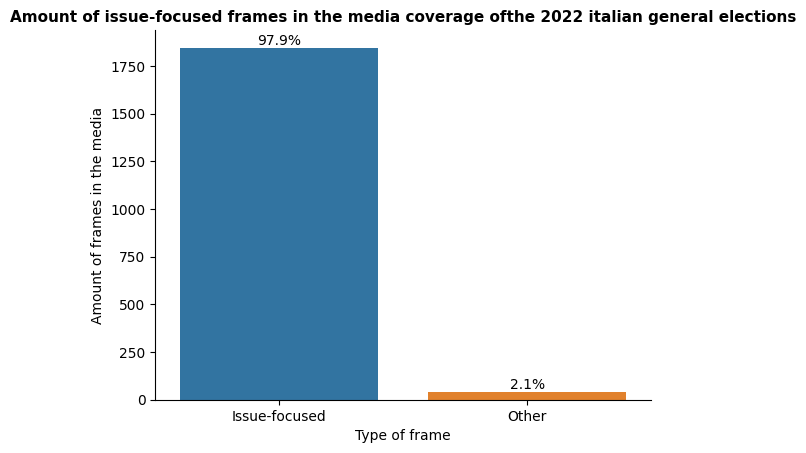

In [36]:
new_category_labels = ['Issue-focused', 'Other']

df_predictions['predictions'] = df_predictions['predictions'].replace({'Issue-focused': new_category_labels[1],
                                                                    'Other': new_category_labels[0]})

plot1 = sns.countplot(x='predictions', data=df_predictions,  dodge=2)   
plot1.set_xticklabels(new_category_labels)
plot1.set_title('Amount of issue-focused frames in the media coverage ofthe 2022 italian general elections', size=11, fontweight='bold', color='black')
plot1.set(xlabel='Type of frame',
       ylabel='Amount of frames in the media')

value_counts = unlabeled_articles['predictions'].value_counts()
total = value_counts.sum()
for p in plot1.patches:
    height = p.get_height()
    percentage = f"{height/total:.1%}"
    plot1.annotate(percentage, (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
    
sns.despine()
plt.savefig('Figure1.png')
plot1.figure.show

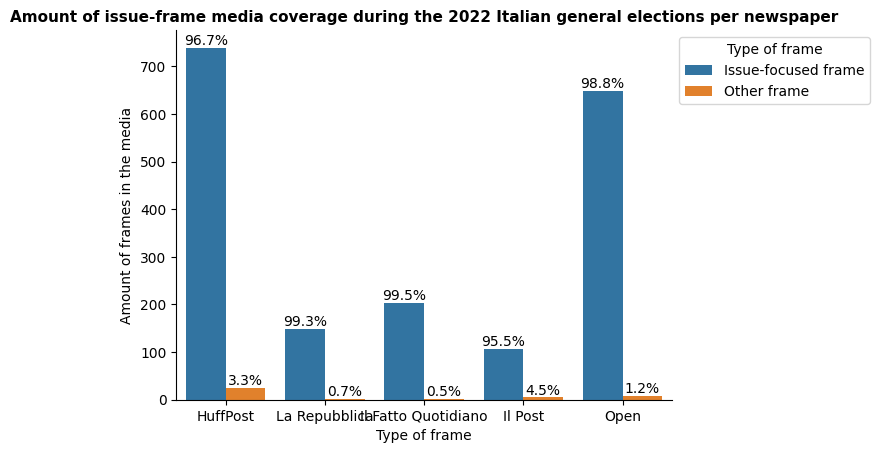

In [37]:
plot2 = sns.countplot(x="News outlet", hue="predictions", data=df_predictions, dodge=2)
plot2.legend(title='Type of frame', labels=['Issue-focused frame', 'Other frame'], bbox_to_anchor=(1, 1))
legend_font = {'family': 'Arial', 'size': 12, 'weight': 'bold'}
plot2.set_title('Amount of issue-frame media coverage during the 2022 Italian general elections per newspaper', size=11, fontweight='bold', color='black')
plot2.set(xlabel='Type of frame', ylabel='Amount of frames in the media')



def with_hue(ax, feature, number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(number_of_categories):
        for j in range(hue_categories):
            count = a[(j*number_of_categories + i)]
            news_outlet = feature.unique()[i]
            total = feature[feature == news_outlet].count()
            percentage = '{:.1f}%'.format(count/total*100)
            x = patch[(j*number_of_categories + i)].get_x() + patch[(j*number_of_categories + i)].get_width() / 2
            y = patch[(j*number_of_categories + i)].get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom', color='black', size=10)
number_of_categories = len(df_predictions["News outlet"].unique())
hue_categories = len(df_predictions["predictions"].unique())

with_hue(plot2, df_predictions["News outlet"], number_of_categories, hue_categories)
sns.despine()
plt.savefig('Figure2.png')
plt.show()

Now, I run the chi-square test. I first have to regrouo the values fo the News outlet column: I assign the value of 0 to La Repubblica and Il fatto Quotidiano (both print and online news outlets) and 1 to Il Post, Open and HuffPost (solely online news outlets). Then, I calculate the observed frequencies and, fianlly, I can calculate the chi square. In the end, I print the results. 

In [38]:
mapping = {'La Repubblica': '0', 'Il Fatto Quotidiano': '0', 'HuffPost': '1', 'Open': '1', 'Il Post': '1'}

# Replace the values in the 'category' column using the mapping
df_predictions['News outlet2'] = df_predictions['News outlet'].replace(mapping)

# Print the updated DataFrame
print(df_predictions)

     News outlet                                          Full_text  \
0       HuffPost  Il Partito Democratico torni ad essere un part...   
1       HuffPost  Se il Pd vuole rinascere abbandoni l'arcaica p...   
2       HuffPost  Un Figliuolo del gas. Meloni vuole centralizza...   
3       HuffPost  Bossi torna in campo: nasce il Comitato Nord. ...   
4       HuffPost  Niente veti. Berlusconi vede Meloni e dà un ai...   
...          ...                                                ...   
1942        Open  «Nemici dei lavoratori», «Siete come Meloni»: ...   
1943        Open  Elodie, attacco social a Fratelli d’Italia: «H...   
1944        Open  Ora che è finita col Pd Conte pensa alle liste...   
1945        Open  Letta contraccambia l’addio di Conte: «Con il ...   
1946        Open  Cacciari: «Mattarella non ci porterà mai al vo...   

      predictions News outlet2  
0               0            1  
1               0            1  
2               0            1  
3              

In [39]:
observed = pd.crosstab(df_predictions['News outlet2'], df_predictions['predictions'])

print(observed)

predictions      0   5
News outlet2          
0              352   2
1             1494  38


In [40]:
observed = np.array([[352, 2], [38, 1494]])

chi2, p, dof, expected = chi2_contingency(observed)

table = [
    ["Chi-square statistic:", chi2],
    ["p-value:", str(p)],
    ["Degrees of freedom:", dof],
    ["Expected frequencies:"]
]
table.extend(expected.tolist())

print(tabulate(table, headers=["", "Value"]))

                          Value
---------------------  --------
Chi-square statistic:  1642.05
p-value:                  0
Degrees of freedom:       1
Expected frequencies:
73.20254506892896       280.797
316.79745493107106     1215.2


<bound method Figure.show of <Figure size 640x480 with 1 Axes>>

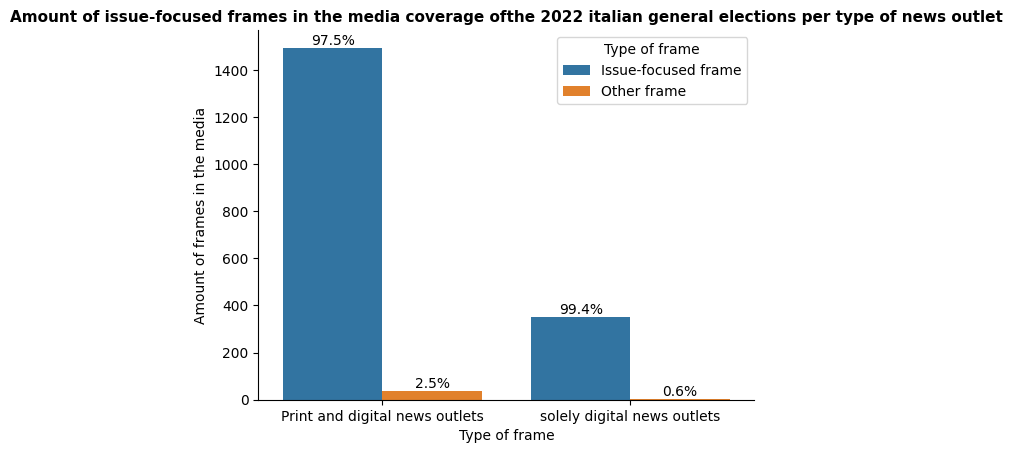

In [41]:
new_category_labels = ['Print and digital news outlets', 'solely digital news outlets']

df_predictions['predictions'] = df_predictions['predictions'].replace({'solely digitsl news outlets': new_category_labels[1],
                                                                    'Print and digital news outlets': new_category_labels[0]})

plot3 = sns.countplot(x='News outlet2', hue=predictions, data=df_predictions,  dodge=2)  
plot3.set_xticklabels(new_category_labels)
plot3.set_title('Amount of issue-focused frames in the media coverage ofthe 2022 italian general elections per type of news outlet', size=11, fontweight='bold', color='black')
plot3.set(xlabel='Type of frame',
       ylabel='Amount of frames in the media')
plot3.legend(title='Type of frame', labels=['Issue-focused frame', 'Other frame'], bbox_to_anchor=(1, 1))
legend_font = {'family': 'Arial', 'size': 12, 'weight': 'bold'}

def with_hue(ax, feature, number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(number_of_categories):
        for j in range(hue_categories):
            count = a[(j*number_of_categories + i)]
            news_outlet = feature.unique()[i]
            total = feature[feature == news_outlet].count()
            percentage = '{:.1f}%'.format(count/total*100)
            x = patch[(j*number_of_categories + i)].get_x() + patch[(j*number_of_categories + i)].get_width() / 2
            y = patch[(j*number_of_categories + i)].get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom', color='black', size=10)
number_of_categories = len(df_predictions["News outlet2"].unique())
hue_categories = len(df_predictions["predictions"].unique())
with_hue(plot3, df_predictions["News outlet2"], number_of_categories, hue_categories)
sns.despine()
plt.savefig('Figure3.png')
plot3.figure.show